In [86]:
def show_boxplot(data):
    def milliseconds(x, pos):
        'The two args are the value and tick position'
        return '%i ms' % (x*1e-3)
    
    formatter = FuncFormatter(milliseconds)

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    plt.boxplot(data, labels=['None', '2', '4', '8', '16'], showfliers=False)
    plt.title('Quotient filter vs. dictionary')
    plt.xlabel('remainder size')
    plt.ylabel('run time')
    plt.show()
    

row_count: 100000, chunk_size: 1000


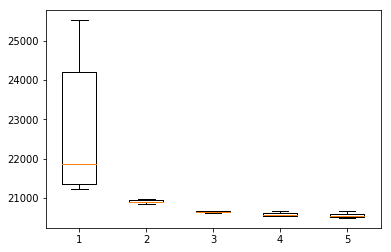

row_count: 100000, chunk_size: 10000


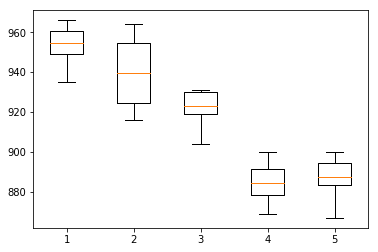

row_count: 100000, chunk_size: 100000


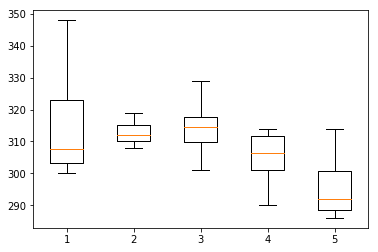

row_count: 500000, chunk_size: 1000


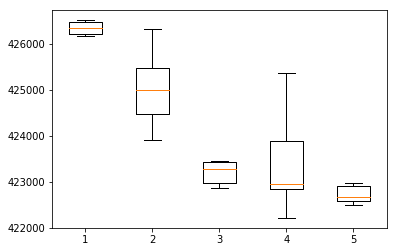

row_count: 500000, chunk_size: 10000


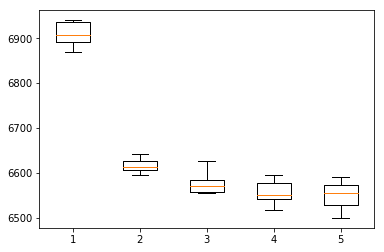

row_count: 500000, chunk_size: 100000


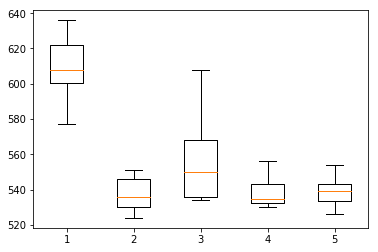

row_count: 1000000, chunk_size: 1000


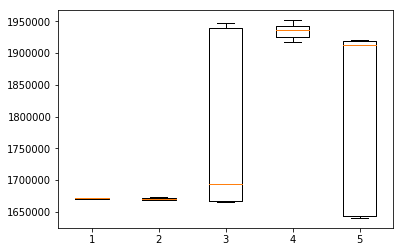

row_count: 1000000, chunk_size: 10000


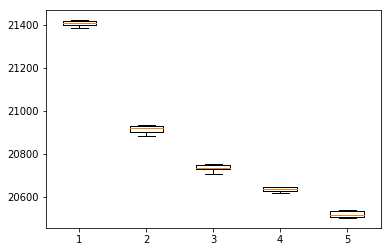

row_count: 1000000, chunk_size: 100000


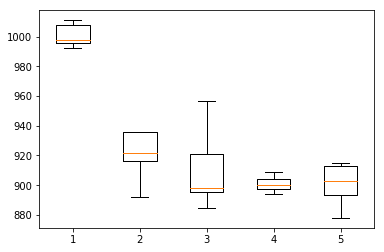

In [88]:
import json
import pandas as pd
import matplotlib.pyplot as plt

table_info = json.load(open('benchmark_results.csv.json','r'))
#print(json.dumps(table_info, indent=2, sort_keys=False))
column_ids = dict()
for column_id in range(0, len(table_info["columns"])):
    column_info = table_info["columns"][column_id]
    column_ids[column_info["name"]] = column_id
    
row_count_column = column_ids["row_count"] 
chunk_size_column = column_ids["chunk_size"] 
remainder_size_column = column_ids["remainder_size"]
run_time_column = column_ids["run_time"]

data = pd.read_csv('benchmark_results.csv', header=None)
grouped_data = data.groupby([row_count_column, chunk_size_column])
for group_info in list(grouped_data.groups):
    row_count = group_info[0]
    chunk_size = group_info[1]
    print("row_count: " + str(row_count) + ", chunk_size: " + str(chunk_size))
    group = grouped_data.get_group(group_info)
    sub_groups = group.groupby([remainder_size_column])
    run_time_data = []
    for remainder_size in list(sub_groups.groups):
        sub_group = sub_groups.get_group(remainder_size)
        run_time_data.append(sub_group[run_time_column])
    plt.boxplot(run_time_data, showfliers=False)
    plt.show()
